# Ford GoBike System Data
## by Murtala Umar Adamu

## Introduction
> The Ford Gobike System Dataset is a bike sharing dataset that captures the rides by users of the system. The dataset has 183412 rows and 16 columns. Additionally, the dataset covers the greater San Francisco Bay Area. The 16 columns or features in the dataset are:
    <ol>
        <li> duration_sec
        <li> start_time
        <li> end_time
        <li> start_station
        <li> start_station_name
        <li> start_station_latitude
        <li> start_station_longitude
        <li> end_station
        <li> end_station_name
        <li> end_station_latitude
        <li> end_station_longitude
        <li> bike_id
        <li> user_type
        <li> member_birth_year
        <li> member_gender
        <li> bike_share_for_all_trip
     </ol>


## Preliminary Wrangling


In [53]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [54]:
#importing dataset to a dataframe
gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [55]:
#brief view of dataset
gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [56]:
#checking for null values
gobike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> We can see that some of the columns have null values. In order to have an evenly represented analysis, rows that have null values in some columns will be dropped.

In [57]:
#confirming column data type
gobike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [58]:
#specific columns dtypes will be changed
gobike_df[['start_time','end_time','start_station_id','end_station_id','member_birth_year']].dtypes

start_time            object
end_time              object
start_station_id     float64
end_station_id       float64
member_birth_year    float64
dtype: object

In [59]:
# number of columns and rows
gobike_df.shape

(183412, 16)

> Note that some columns are having the wrong data types. These columns are start_time, end_time, start_station_id, end_station_id and member_birth_year. This will all be chnaged to the correct data types accordingly.

### Cleaning

> Dropping rows with null values from the dataframes. 

In [60]:
#dropping rows with null values in our dataframe.
gobike_clean = gobike_df.dropna(axis = 0, how = 'any')

> Changing the datatype of columns

In [61]:
#change start_time and end_time datatype
gobike_clean.loc[:,'start_time'] = pd.to_datetime(gobike_clean.loc[:,'start_time'])
gobike_clean.loc[:,'end_time'] = pd.to_datetime(gobike_clean.loc[:,'end_time'])

#get day of the week and save in a column
gobike_clean.loc[:,'starting_day'] = gobike_clean.loc[:,'start_time'].dt.day_name()
gobike_clean.loc[:,'ending_day'] = gobike_clean.loc[:,'end_time'].dt.day_name()

C:\Users\alami\AppData\Local\Temp\ipykernel_26104\2674744331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean.loc[:,'start_time'] = pd.to_datetime(gobike_clean.loc[:,'start_time'])
C:\Users\alami\AppData\Local\Temp\ipykernel_26104\2674744331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean.loc[:,'end_time'] = pd.to_datetime(gobike_clean.loc[:,'end_time'])
C:\Users\alami\AppData\Local\Temp\ipykernel_26104\2674744331.py:6: SettingWithCopyWarning: 
A value is trying to be set on

In [62]:
#change start and end station id dtypes to int
gobike_clean.loc[:,'start_station_id'] = gobike_clean['start_station_id'].astype(int)
gobike_clean.loc[:,'end_station_id'] = gobike_clean['end_station_id'].astype(int)

#change member_birth_year dtype to int
gobike_clean.loc[:,'member_birth_year'] = gobike_clean['member_birth_year'].astype(int)

C:\Users\alami\AppData\Local\Temp\ipykernel_26104\1453214736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean.loc[:,'start_station_id'] = gobike_clean['start_station_id'].astype(int)
C:\Users\alami\AppData\Local\Temp\ipykernel_26104\1453214736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean.loc[:,'end_station_id'] = gobike_clean['end_station_id'].astype(int)
C:\Users\alami\AppData\Local\Temp\ipykernel_26104\1453214736.py:6: SettingWithCopyWarning: 
A value is trying to be se

### Testing our changes

In [63]:
#checking if columns have been dropped
print("gobike_df:", len(gobike_df), "\ngobike_clean:", 
       len(gobike_clean), "\nNumber of rows with at least 1 NA value: ",
       (len(gobike_df)-len(gobike_clean)))

gobike_df: 183412 
gobike_clean: 174952 
Number of rows with at least 1 NA value:  8460


In [64]:
#checking for null values
gobike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
starting_day               0
ending_day                 0
dtype: int64

In [65]:
#confirming shape of the dataframe
gobike_clean.shape

(174952, 18)

In [66]:
#confirming dtypes on the columns we changes
gobike_clean[['start_time','end_time','start_station_id','end_station_id','member_birth_year']].dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id              int32
end_station_id                int32
member_birth_year             int32
dtype: object

> Our data is now clean. All null values have been removed as well as data types have been corrected. We can now proceed to carrying out our exploratory data analysis.  



### What is the structure of your dataset?
> Our dataset has **174952** and **18** columns after all cleaning and data engineering

### What is/are the main feature(s) of interest in your dataset?

> Features of interest include: 
    <ul>
        <li>duration_sec
        <li>start_time
        <li>end_time
        <li>start_station_id
         <li>end_station_id
         <li>bike_id
         <li>user_type
         <li>member_birth_year
          <li>user_type
         <li>member_gender
          <li>starting_day
          <li>ending_day
    </ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will support our investigation:
     <ol>
        <li>duration_sec
        <li>start_time
        <li>end_time
        <li>bike_id
         <li>user_type
         <li>member_birth_year
          <li> user_type
         <li>member_gender
          <li>starting_day
          <li>ending_day
    </ol>

## Univariate Exploration

### Define
> Investigation the distribution by member_gender 

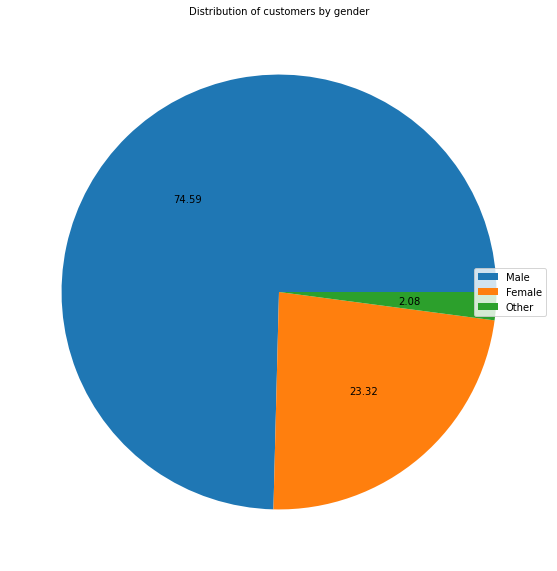

In [67]:
#a function to capture distribution value
def autopct(pct): 
    return ('%.2f' % pct) if pct > 0 else ''

#storing labels in a variable
my_labels = ('Male','Female','Other')

#plotting the distribution of member_gender
ax = gobike_clean['member_gender'].value_counts().plot(kind='pie', figsize=(20,10), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
ax.set_title("Distribution of customers by gender", fontsize = 10)
plt.legend(loc=5, labels=my_labels)

> The pie chart above does a good job showing us the distribution of customers accroding to their gender. About 2/3rd of the customers are all male.

### Define

> Investigating the most used bikes

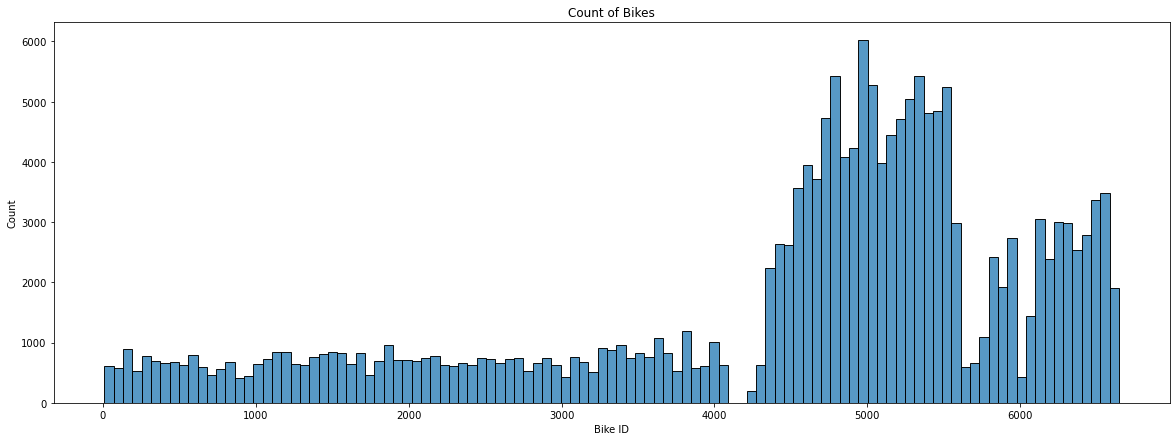

In [68]:
#bar chart showing usage distribution by bike_id
plt.figure(figsize = (20, 7))
sb.histplot(data = gobike_clean, x = 'bike_id')
plt.xlabel('Bike ID')
plt.title('Count of Bikes');

> It can be noted from the above extract that the most used bike is **bike 4794**. 

### Define

> Investingating the day customers used gobikes the most

In [69]:
def myCountPlot (df,xVar,hueVar=None,color=0,palette=None,order=None, hue_order=None):
        '''
        docstring: IMPORTANT: The function is used to plots graphs.
        inputs: it takes in a dataframe and desired variables.
        output: it returns a graph of the plotted features.
        '''
        # set plot dimensions
        plt.figure(figsize=[17, 5])
        # plot
        sb.countplot(data=df, x=xVar, hue=hueVar, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black', hue_order=hue_order);
        # clean up varibale names
        xVar=xVar.replace('_',' ') # replace _ with a space
        if hueVar:
            hueVar=hueVar.replace('_',' ')
        # Add title and format it
        plt.title(f'''Distribution of {xVar} {hueVar if hueVar else ''}'''.title(), fontsize=14, weight='bold')
        # Add x label and format it
        plt.xlabel(xVar.title(), fontsize=10, weight='bold')
        # Add y label and format it
        plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
        plt.xticks(rotation = 45);

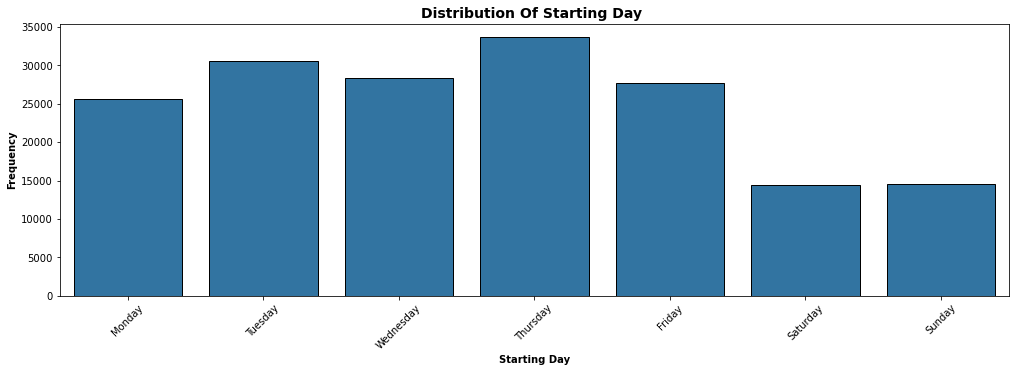

In [70]:
# days in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# call function
myCountPlot(gobike_clean,'starting_day', order = days_order)

> From the graph above, gobikes are mostly on Thursdays, followed Tuesday

### Define

> Investigating customers distribution based on user_type

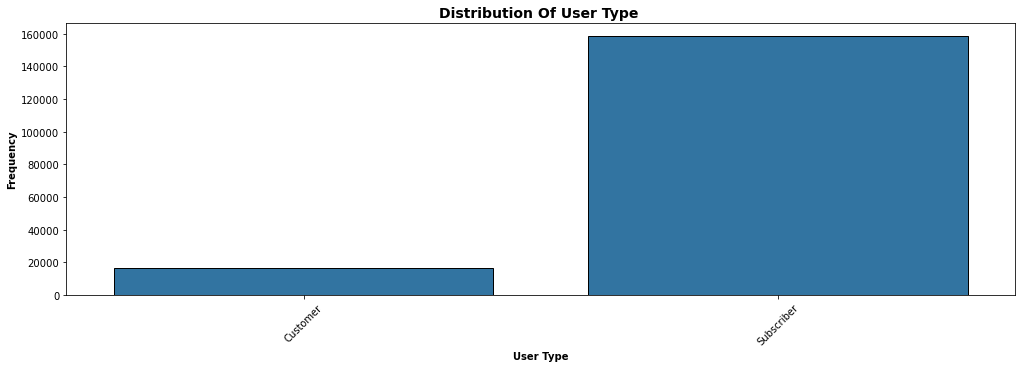

In [71]:
# call function
myCountPlot(gobike_clean,'user_type')

> From the distribution above, there are more subscribers than customers. 

### Define

> Investigating customer distribution by birth year

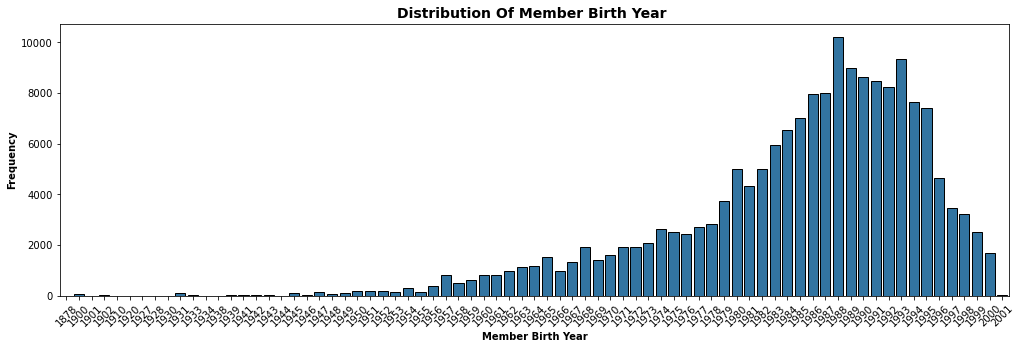

In [72]:
# call function
myCountPlot(gobike_clean,'member_birth_year')

> From the above graph,  we can see that the majority of our users are born in **1988**.

### Define

> Investigating the most used starting stations

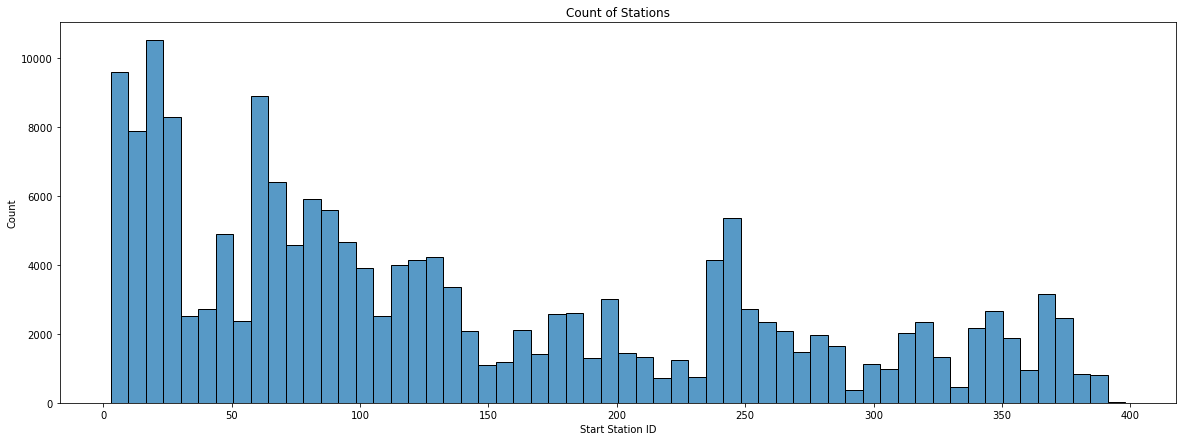

In [73]:
#bar chart showing usage distribution by start_station_id
plt.figure(figsize = (20, 7))
sb.histplot(data = gobike_clean, x = 'start_station_id')
plt.xlabel('Start Station ID')
plt.title('Count of Stations');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Five features were looked into including member_gender, bike_id, starting_day, user_type & member_birth_year. The starting_day column is a transformation of the start_time column. This was necessary to determine the day of the week. It was discovered a majority of the customers were male (74.59). Similary, over 155,000 of the customers are subscribers.   

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Various actions were taken to tidy the data. The datatype of the start_time and end_time columns had to be changed to datetime columns. Days of the week were then extracted making two new columns, starting_day and ending_day. The start_station_id, end_station_id and member_birth_year were changed from float columns to interger columns. <p>Interestingly, the member_birth_year column is also left skewed. The data can also be considered to be unimodal</p> 



## Bivariate Exploration

### Define 
> A side by side look at member gender and user type

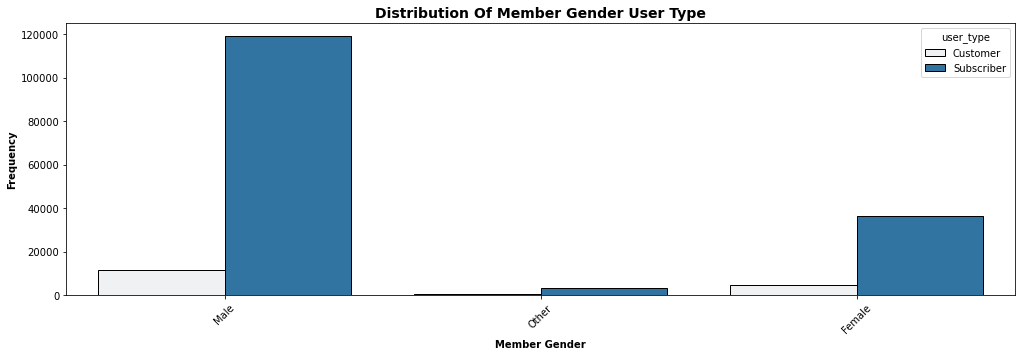

In [74]:
# call function
myCountPlot(gobike_clean, 'member_gender', hueVar = 'user_type')

> Above, we see that the majority of our male customers equally make up the majority of subscribers as well as customer category. This graph provides us with a better view and insight into how gobike users are spread in the user_type and member gender.

### Define

> Investigating customer age and the duration they use gobikes for.

C:\Users\alami\AppData\Local\Temp\ipykernel_26104\405162615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean['age']  = 2019 - gobike_clean['member_birth_year']
C:\Users\alami\AppData\Local\Temp\ipykernel_26104\405162615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean['minutes']  = gobike_clean['duration_sec']/60


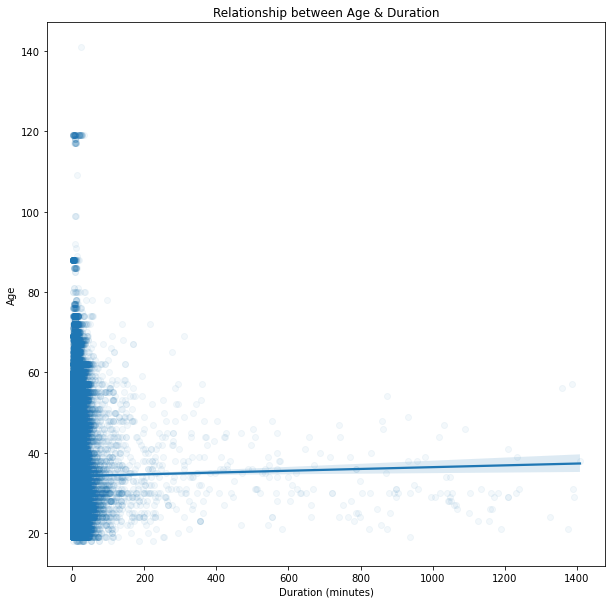

In [75]:
#getting customer age
gobike_clean['age']  = 2019 - gobike_clean['member_birth_year'] 

#calculating time in minutes
gobike_clean['minutes']  = gobike_clean['duration_sec']/60 

#plotting our scatter plot
plt.figure(figsize = (10, 10))
sb.regplot(data = gobike_clean, x = 'minutes', y = 'age', scatter_kws={'alpha':1/20})
plt.xlabel('Duration (minutes)')
plt.ylabel('Age')
plt.title('Relationship between Age & Duration');

> The scatter plot above shows the existense of a positive relationship between age and the duration a user makes use of a bike. The regression line in the scatter plot shows a positive correlation between the two variables. <p>The heatmap below further provides insight to how strong the relationship between the two variable is. Going by the colour scale, it is safe to say the relationship is positive albiet weak.</p>

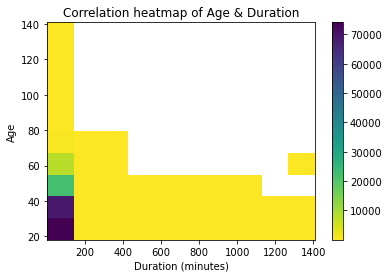

In [76]:
#correlation heatmap showing the relationship between minutes & age
plt.hist2d(data = gobike_clean, x = 'minutes', y = 'age', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Duration (minutes)')
plt.ylabel('Age')
plt.title('Correlation heatmap of Age & Duration');

### Define

> Investigating the relationship between the duration customers use bikes and user type.

C:\Users\alami\AppData\Local\Temp\ipykernel_26104\695640099.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean['user_type'] = gobike_clean['user_type'].astype(customer);


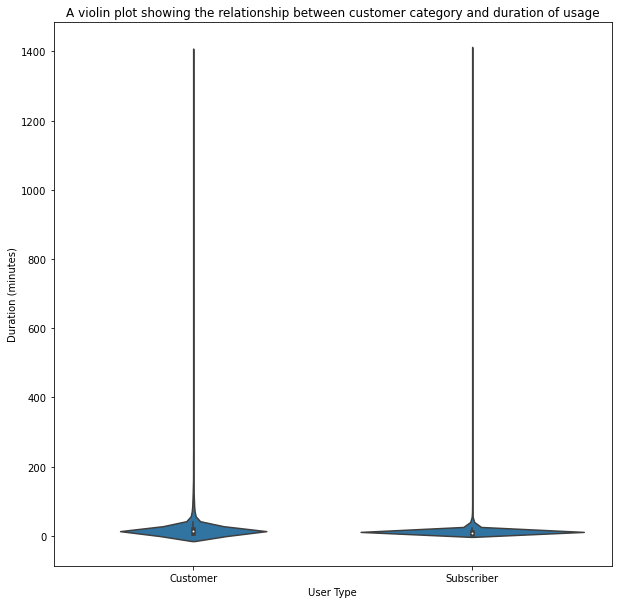

In [77]:
# gender categories
customer_cat = ['Customer', 'Subscriber']

# Returns the types for member_gender with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
customer = pd.api.types.CategoricalDtype(ordered=True, categories=customer_cat)

# Use pandas.astype() to convert the "member_gender" column from a plain object type into an ordered categorical type 
gobike_clean['user_type'] = gobike_clean['user_type'].astype(customer);

#color_palette
base_color = sb.color_palette()[0]

#setting figure size
plt.figure(figsize = (10, 10))

#plotting our graph
sb.violinplot(data = gobike_clean, x = 'user_type', y = 'minutes', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('A violin plot showing the relationship between customer category and duration of usage');

> Using the voilin plot above, we are able to deduce that users of the customer category use the bikes for longer durations than the users of the subscriber category. However, the long tails on both categories, suggest there are outliers. <p>The boxplot below makes clear the presence of outliers more on the part of the subscribers. </p>

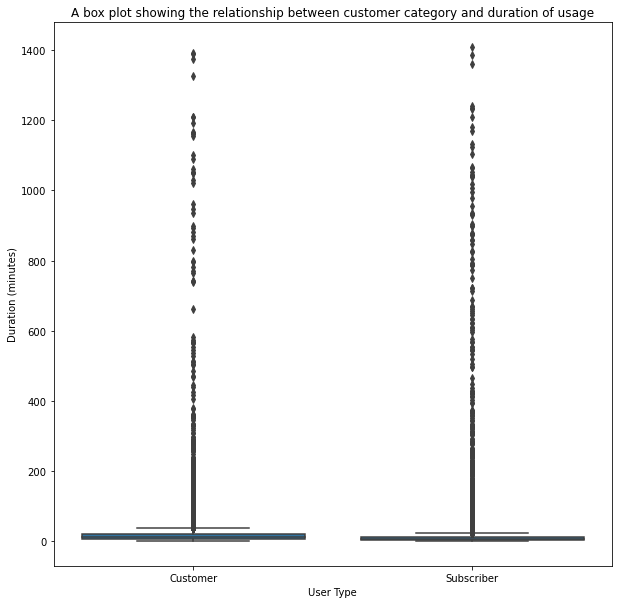

In [78]:
#setting figure size
plt.figure(figsize = (10, 10))

#plotting our graph
sb.boxplot(data = gobike_clean, x = 'user_type', y = 'minutes', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('A box plot showing the relationship between customer category and duration of usage');

### Define

> Investigating starting stations with high customer influx.

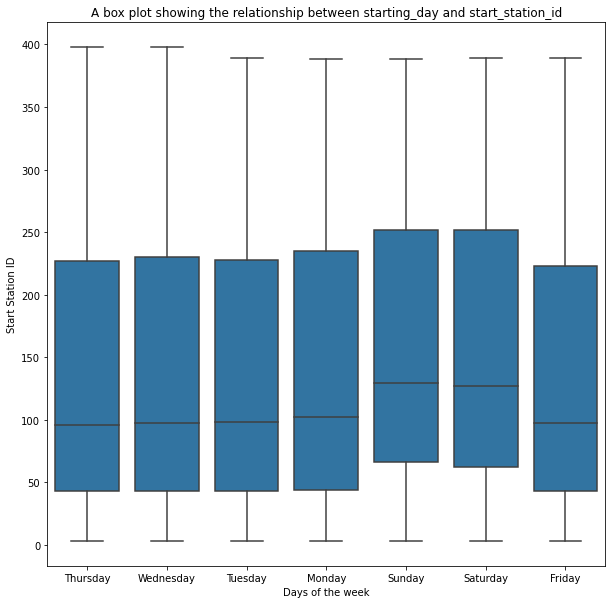

In [79]:
#setting figure size
plt.figure(figsize = (10, 10))

#plotting our graph
sb.boxplot(data = gobike_clean, x = 'starting_day', y = 'start_station_id', color = base_color)
plt.xlabel('Days of the week')
plt.ylabel('Start Station ID')
plt.title('A box plot showing the relationship between starting_day and start_station_id');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was observed that people below the age took longer. However, there was a higher concentration of people who took rides for less than an hour. Additionally, it was also observed that customers took more rides that lasted less than hour when compared to subscribers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The age feature which was created as a result of a feature engineering is considered a feature of interest. This is primarily because it brings out interesting characteristics about the customers and their gender.

## Multivariate Exploration

### Define

> Investigating the relationship between duration(minutes), age, member gender.

C:\Users\alami\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


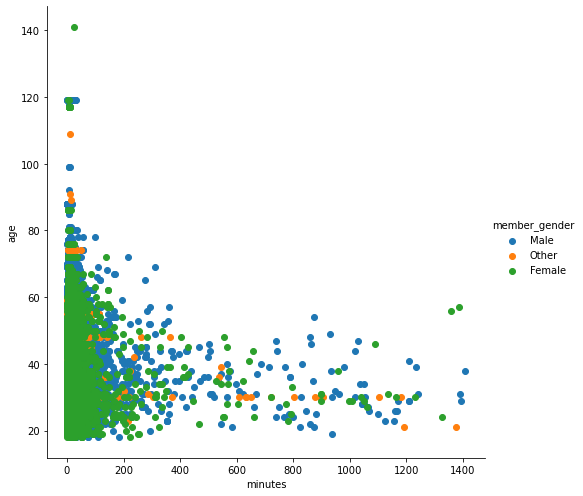

In [80]:
#relationship between duration, age and member gender
g = sb.FacetGrid(data = gobike_clean, hue = 'member_gender', size = 7)
g.map(plt.scatter, 'minutes', 'age')
g.add_legend();

> From the scatter plot above, note that there is a high concentration of females who took rides for upto **200 minutes**. As it increases, we see that this reduces. However, we see two outliers of about **60 years** of age who took rides of upto **1400 minutes**.   

### Define
> Investigating the relationship between duration, age & user type

C:\Users\alami\AppData\Local\Temp\ipykernel_26104\1209160297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike_clean['minutes_int']=((gobike_clean['minutes']//10)*10).astype(int)


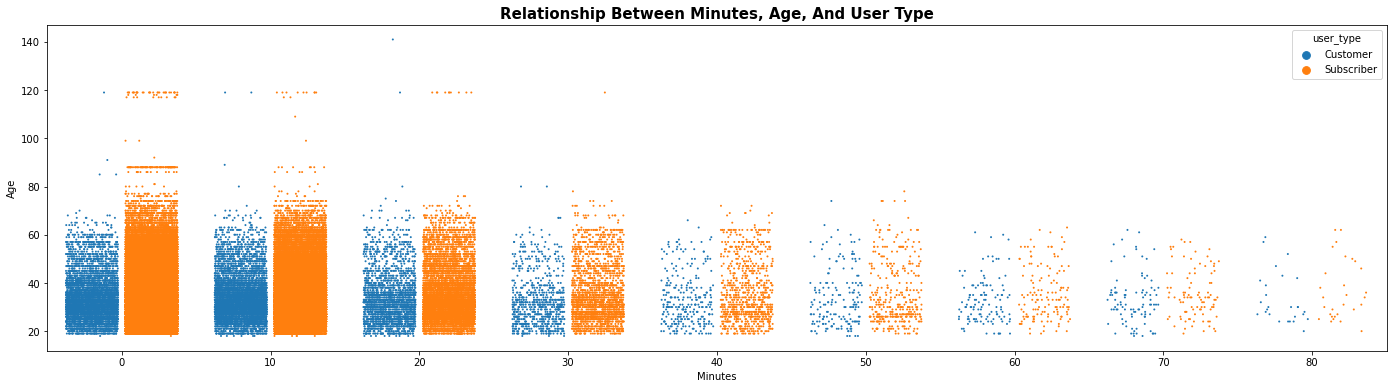

In [86]:
#stripplot showing relationship between age, duration, and user type
plt.figure(figsize = (24, 6))

# create minute 10 minutes intervals using floor division (lowest integer divisor) 
gobike_clean['minutes_int']=((gobike_clean['minutes']//10)*10).astype(int)

sb.stripplot(data = gobike_clean.query('minutes<minutes.quantile(0.995)'), 
		x='minutes_int', y='age', hue='user_type', size=2, jitter=0.35, dodge=True)

plt.xlabel('Minutes')
plt.ylabel('Age')
plt.title('Relationship between minutes, age, and user type'.title(), fontsize=15, fontweight='bold');

> We are able to see that we have a higher concentration of subscribers over customers who take longer rides of upto **1400 minutes** below the age of **60 years**. Interestingly, the scatter plot which captured the member gender revealed two female outliers of about 60 years who took rides for about 1400 minutes, this scatter plot reveals to us that they subscribers. It is safe to assume that they are probably habitual riders.

### Define

> Investigating trip duartion across member gender in different days

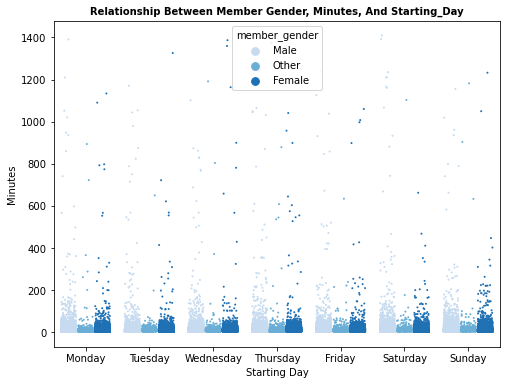

In [87]:
#a strip plot showing trip duartion across user type in different days
fig = plt.figure(figsize = [8, 6])
sb.stripplot(data = gobike_clean, x = 'starting_day', y = 'minutes', hue = 'member_gender', palette = 'Blues', order = days_order,
                    size = 2, jitter = 0.35, dodge = True)
plt.xlabel('Starting Day')
plt.ylabel('Minutes')
plt.title('Relationship between member gender, minutes, and starting_day'.title(), fontsize=10, fontweight='bold');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The scatter plots above provided more insight into how member gender is distributed when plotted with age and duration (minutes). We can see that the male gender rode for longer age 60 years and below whereas two from the female gender above the age of 60 years rode for upto 1400 minutes. Similarly, in the following scatter plot, we observe that the majority of those rode for longer durations are subscribers.  

### Were there any interesting or surprising interactions between features?

> In the point plot we see an interesting interaction between the duration column, week days and member gender features. The other can be seen to have taken the longest mean trip duration.  

## Conclusions

The following are the main findings from the above exploratory analysis.
1. Two third of the users of gobikes are male
2. Bike 4794 is the most used bike with close to 6000 rides.
3. Thursday is the day go bikes are most used with close 35000 rides.
4. There are more subscribers to ford gobikes than customers.
5. Majority of the ford gobike users are born in 1988.
6. Male customers makeup the majority of subscribers and customer user type.
7. Users 40 years and below are more likely to take longer rides. 
8. More users of the customer user type category used the bikes for upto 100 minutes.
9. There are more male customers who used the bikes for upto 1400 minutes. 
10. Two females, age 60 years took rides lasting about 1400 minutes.
11. Those who too the longer above 400 minutes are mostly subscribers.
12. The other gender took the longest mean trip duration on sunday.


In [40]:
gobike_clean.shape

(174952, 20)